# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.decomposition import PCA

# Loading data

In [2]:
wine = 'white' # Change this variable to conduct operations on 'red' or 'white'
path_prefix = '/Users/sanketshah/'
data = pd.read_csv(path_prefix + 'Jupyter_Notebooks/Wine_Quality/winequality-' + wine + '.csv', sep = ";")

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Binning the qualities
The 'quality' feature in this dataframe is numerical value but we need to make a categorical variable out of it.

Hence, we bin 1-3 as poor, 4-6 as good and 7-9 as excellent

In [4]:
for i in range(len(data)):
    if data['quality'][i] <4:
        data['quality'][i] = 'Poor'
    elif data['quality'][i] < 7 and data['quality'][i] >3:
        data['quality'][i] = 'Good'
    else:
        data['quality'][i] = 'Excellent'
# data.loc[(type(data['quality']) == int) and (data['quality']<4)] = 'Poor'
# data.loc[(type(data['quality']) == int) and (data['quality']>3) and (data['quality']<7)] = 'Good'
# data.loc[(type(data['quality']) == int) and (data['quality']>6)] = 'Excellent'

/var/folders/fd/1d5wyr7s2d187xg5z493hxz80000gn/T/ipykernel_10534/3720652723.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quality'][i] = 'Good'


In [5]:
y = data['quality']
X = data.drop(['quality'], axis=1)

# Normalizing
We do Gaussian normalization on the dataframe

In [6]:
def normalize_column(var_list):
    var_list = np.array(var_list)
    mean = np.mean(var_list)
    std = np.std(var_list)
    
    var_list = (var_list - mean)/std
    
    return list(var_list)

In [7]:
for col in X.columns:
    X[col] = normalize_column(X[col])

In [8]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


# Correlation
Correlation among variables denotes how variables behave with respect to each other.

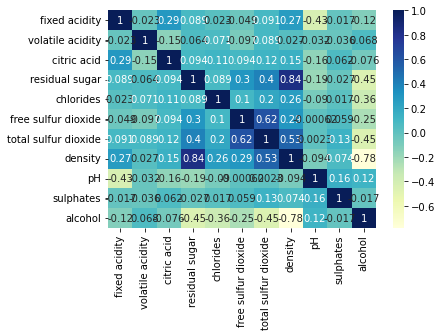

In [9]:
dataplot = sb.heatmap(X.corr(), cmap="YlGnBu", annot=True)


# Principle Component Analysis
Since we saw that there was correlation observed among a lot of variables in the data, we can say that not all variables might be necessary to cover the distribution of data.

Principle Component Analysis involves reducing the dimensions of a database while minimizing the information loss.
For detailed technical explanation
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://wires.onlinelibrary.wiley.com/doi/abs/10.1002/wics.101

https://www.youtube.com/watch?v=HMOI_lkzW08

In [10]:
X_pca = X

pca = PCA(n_components=7)
pca.fit(X_pca)

PCA(n_components=7)

# Explanation on "n_components"

This variable means the number of dimensions we want of the data at the end of PCA.

This parameter of PCA function is manually tunable. It means that it is not necessary that any one specific value is "best".

The more is n_components, the less will be the loss of information. Our goal should be to minimize the dimensions while also trying to minimize the information loss. This is a tradeoff, which we will better understand after this data is used to fit a model. Here, I have only arbitrarily set the value to 7. Hence the resulting data will be of 7 dimensions instead of the original 11

In [15]:
pca.components_

array([[ 0.15721845,  0.00508949,  0.14404984,  0.42740837,  0.21201106,
         0.30033439,  0.4066522 ,  0.5115236 , -0.12883188,  0.04337933,
        -0.43723783],
       [-0.58755821,  0.05172805, -0.34529456,  0.00874939, -0.00880031,
         0.29035514,  0.24403239,  0.0062968 ,  0.5813444 ,  0.22269537,
        -0.03556867],
       [ 0.1213683 , -0.5909715 ,  0.50439688, -0.21431987, -0.10236744,
         0.27941005,  0.12437527, -0.12920286,  0.1266715 ,  0.43324404,
         0.10590316],
       [ 0.01858383,  0.27411517,  0.14851432, -0.27376531,  0.71071228,
        -0.30558549, -0.06045562, -0.0220611 ,  0.09775335,  0.44205953,
        -0.1410787 ],
       [ 0.25104839,  0.64261658,  0.0539051 ,  0.01139144, -0.32862831,
         0.17691226,  0.29300991, -0.08458824, -0.11982553,  0.40058526,
         0.33741948],
       [-0.10353073,  0.1223385 ,  0.13209669, -0.28944693,  0.39582111,
         0.49449355,  0.27631988, -0.32765091, -0.19334116, -0.4810392 ,
         0.139